In [2]:
!pip install tensorflow

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [7]:
mnist=keras.datasets.mnist

In [12]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

**Preprocesing**

In [13]:
np.min(x_train[0]),np.max(x_train[0])

(0, 255)

In [14]:
#Any number minus 0 equals itself
x_train=x_train/255.0
x_test=x_test/255.0
#All values are between 0 and 1

**Model definition**

In [15]:
model=keras.Sequential()
#Convert a matrix to a list
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
#model.build(input_shape=(None,28,28))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist=model.fit(x_train,y_train,epochs=1000,batch_size=256,validation_data=(x_test,y_test))

Epoch 1/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8020 - loss: 0.7353 - val_accuracy: 0.9457 - val_loss: 0.1848
Epoch 2/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9510 - loss: 0.1678 - val_accuracy: 0.9603 - val_loss: 0.1291
Epoch 3/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9657 - loss: 0.1158 - val_accuracy: 0.9668 - val_loss: 0.1067
Epoch 4/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9753 - loss: 0.0866 - val_accuracy: 0.9718 - val_loss: 0.0920
Epoch 5/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9802 - loss: 0.0681 - val_accuracy: 0.9699 - val_loss: 0.0956
Epoch 6/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9831 - loss: 0.0534 - val_accuracy: 0.9734 - val_loss: 0.0856
Epoch 7/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9871 - loss: 0.0443 - val_accuracy: 0.9738 - val_loss: 0.0833
Epoch 8/1000
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9881 - loss: 0.0408 -

In [19]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9769 - loss: 0.3689


[0.3193362057209015, 0.9804999828338623]

In [27]:
data=np.reshape(x_test[10],(-1,784))
data.shape
#model.predict(data)

(1, 784)

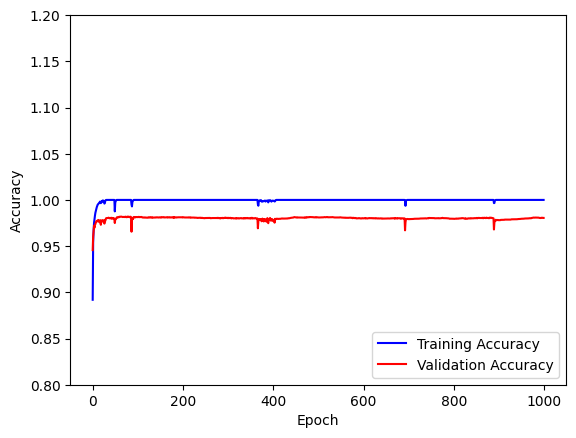

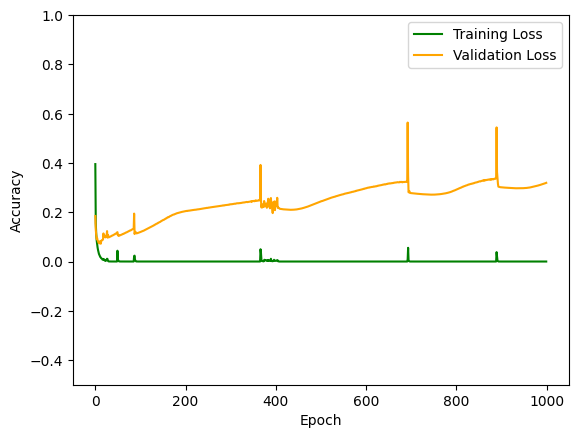

In [34]:
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
plt.plot(acc,label='Training Accuracy',color='blue')
plt.plot(val_acc,label='Validation Accuracy',color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8,1.2])
plt.legend(loc='lower right')
plt.show()
plt.plot(loss,label='Training Loss',color='green')
plt.plot(val_loss,label='Validation Loss',color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.5,1])
plt.legend(loc='upper right')
plt.show()